<a href="https://colab.research.google.com/github/karri-ten/Salary_prediction/blob/main/Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##salary Prediction Using Linear Regression

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [75]:
df = pd.read_csv(r"/content/Salary_dataset.csv")

##Data wrangling

In [76]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [79]:
df.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


In [80]:
df[df.duplicated()]

,Unnamed: 0,YearsExperience,Salary


##Data Cleaning

we notice the columns are not following PEP 8 guidelines
The column unamesd is just a repetitive of the index

In [81]:
df.rename(columns = {'YearsExperience':'experience', 'Salary':'salary', 'Unnamed: 0':'unamed'}, inplace=True)

In [82]:
df.drop('unamed', axis = 1, inplace = True)
df.head()

,experience,salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## EDA

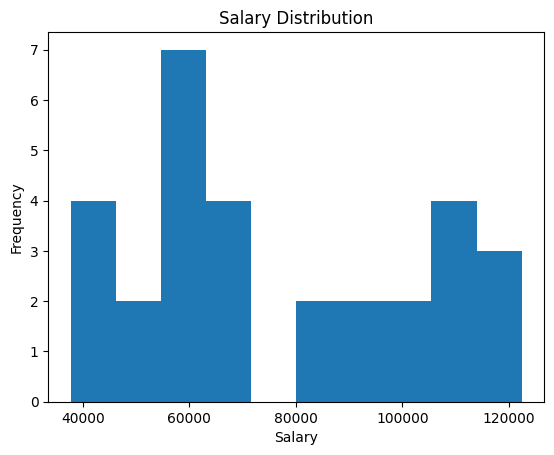

In [83]:
plt.hist(df['salary'])
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

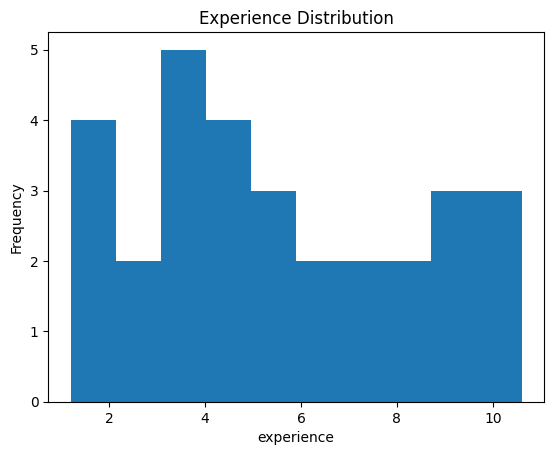

In [84]:
plt.hist(df['experience'])
plt.title('Experience Distribution')
plt.xlabel('experience')
plt.ylabel('Frequency')
plt.show()

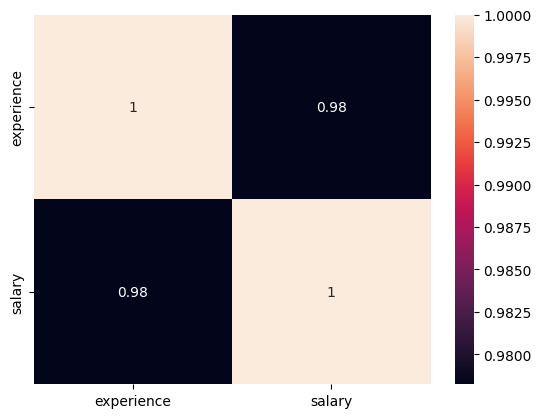

In [85]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

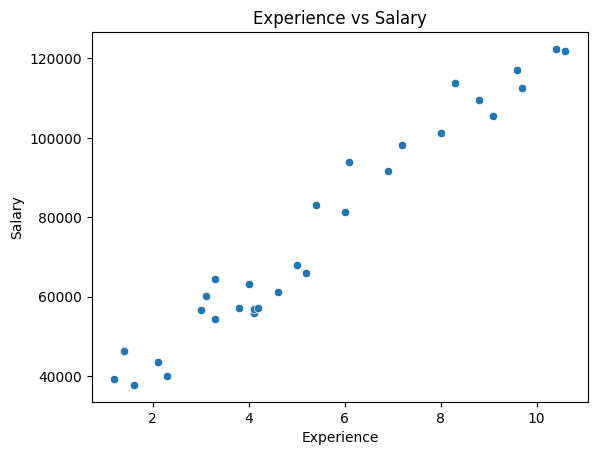

In [86]:
sns.scatterplot(x=df['experience'], y=df['salary'])
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Split the data

In [87]:
y=df['salary']
X=df.drop('salary', axis=1)
print("shape of x", X.shape)
print("shape of y", y.shape)



shape of x (30, 1)
shape of y (30,)


In [101]:
lm = LinearRegression()


In [95]:
model = lm.fit(x_train, y_train)

In [98]:
model

LinearRegression()

In [100]:
predictions = model.predict(x_test)
predictions

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [104]:
from re import M
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, predictions)
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

MAE: 6286.453830757745
MSE: 49830096.855908394
RMSE: 7059.04362190151
R2: 0.9024461774180497


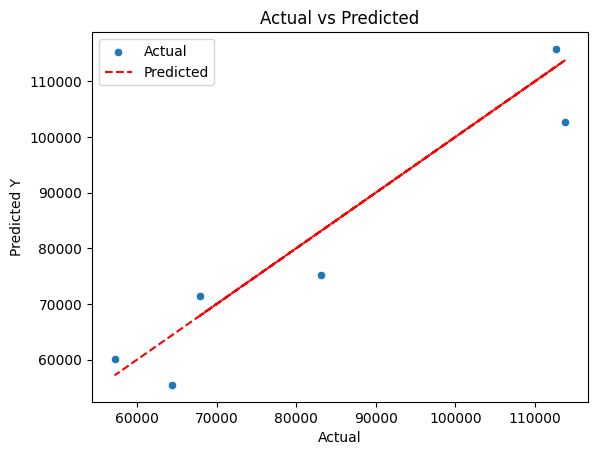

In [110]:
sns.scatterplot(x=y_test, y=predictions)
plt.plot(y_test, y_test, color='red', linestyle = "--" )
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted Y')
plt.legend(['Actual', 'Predicted'])
plt.show()

## VISUAL SUMMARY

1. The scatter plot shows a clear linear relationship between the actual and predicted salary values. This is a positive sign, indicating that your model has captured the underlying trend in the data.
2. Closeness to the Red Line: Most of the data points are clustered relatively close to the red line. This suggests that the model is making fairly accurate predictions for most of the employees in the test dataset.

3. While most points are close to the line, some points do deviate notably. These points represent instances where the model made larger prediction errors. Some employees' salaries are being overestimated or underestimated by a more significant amount

**MAE** represents the average absolute difference between the model's predictions and the actual salary values.

**MAE** of 6286.45 suggests that, on average, the model's predictions are off by about 6,286.45.

**RMSE** of 7059.04 indicates that the typical prediction error is around 7,059.04 which is slightly higher than **MAE** because it penalizes larger errors more.

**R2** represents the proportion of variance in the dependent variable (salary) that is explained by the independent variable (experience) in the model. **R2** of 0.9024 is very good! It indicates that the model explains about 90.24% of the variability in salary.
This suggests a strong relationship between experience and salary, and your model is capturing it well.

## CONCLUSION
The model has a high R2 value, which suggests a strong fit and good predictive power.
The MAE and RMSE values are relatively low, indicating reasonable prediction accuracy.
While there are some errors (as reflected in MAE and RMSE), they are relatively small compared to the typical salary range. In conclusion, the model appears to be well-suited for predicting salary based on experience